In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/home/nr/Downloads/insurance_claims.xls')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.drop('insured_zip', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date                  1000 non-null object
incident_type   

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
df.drop('_c39',axis=1,inplace=True)

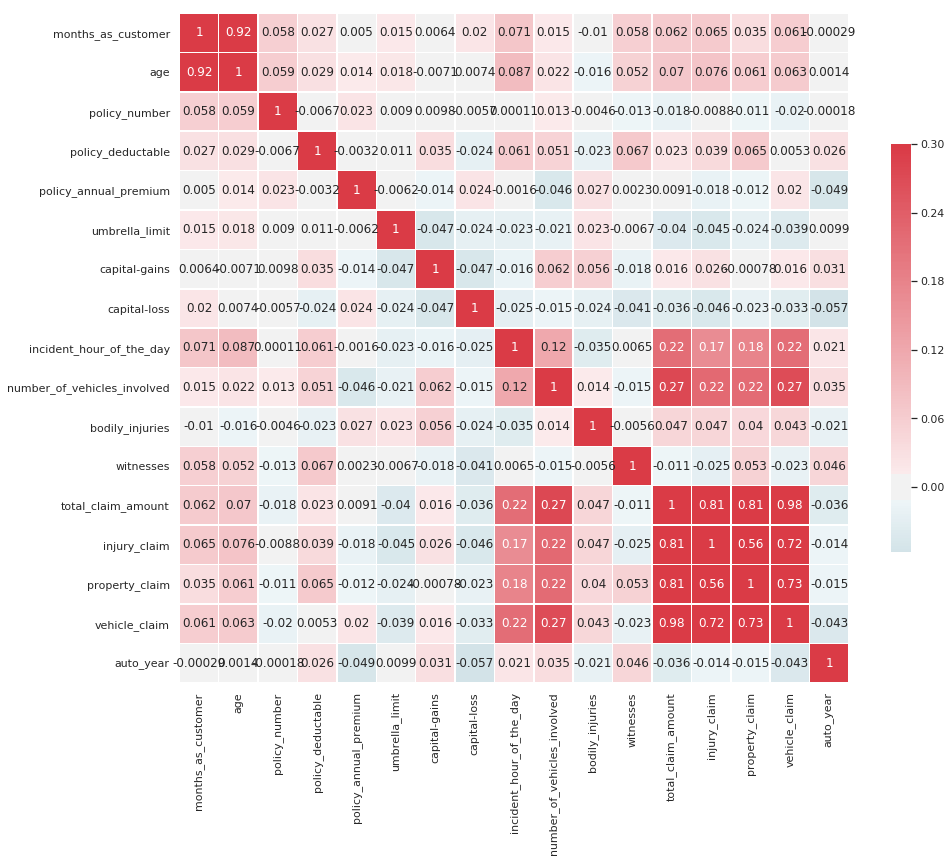

In [8]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



There seem to be some fairly high correlation between the total_claim_amount with the property_claim, vehicle_claim
and injury_claim. Whats more surprising is that property_claim, vehicle_claim
and injury_claim are correlated with each other. its worth investigating

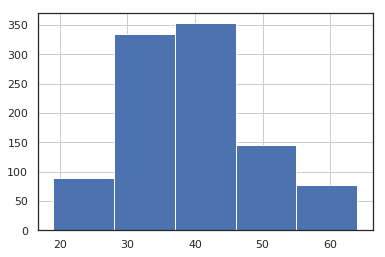

In [9]:
df['age'].hist(bins=5)

In [10]:
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import cufflinks as cf
#init_notebook_mode()
#cf.go_offline()

In [11]:
df['insured_hobbies'].nunique()

20

In [12]:
df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

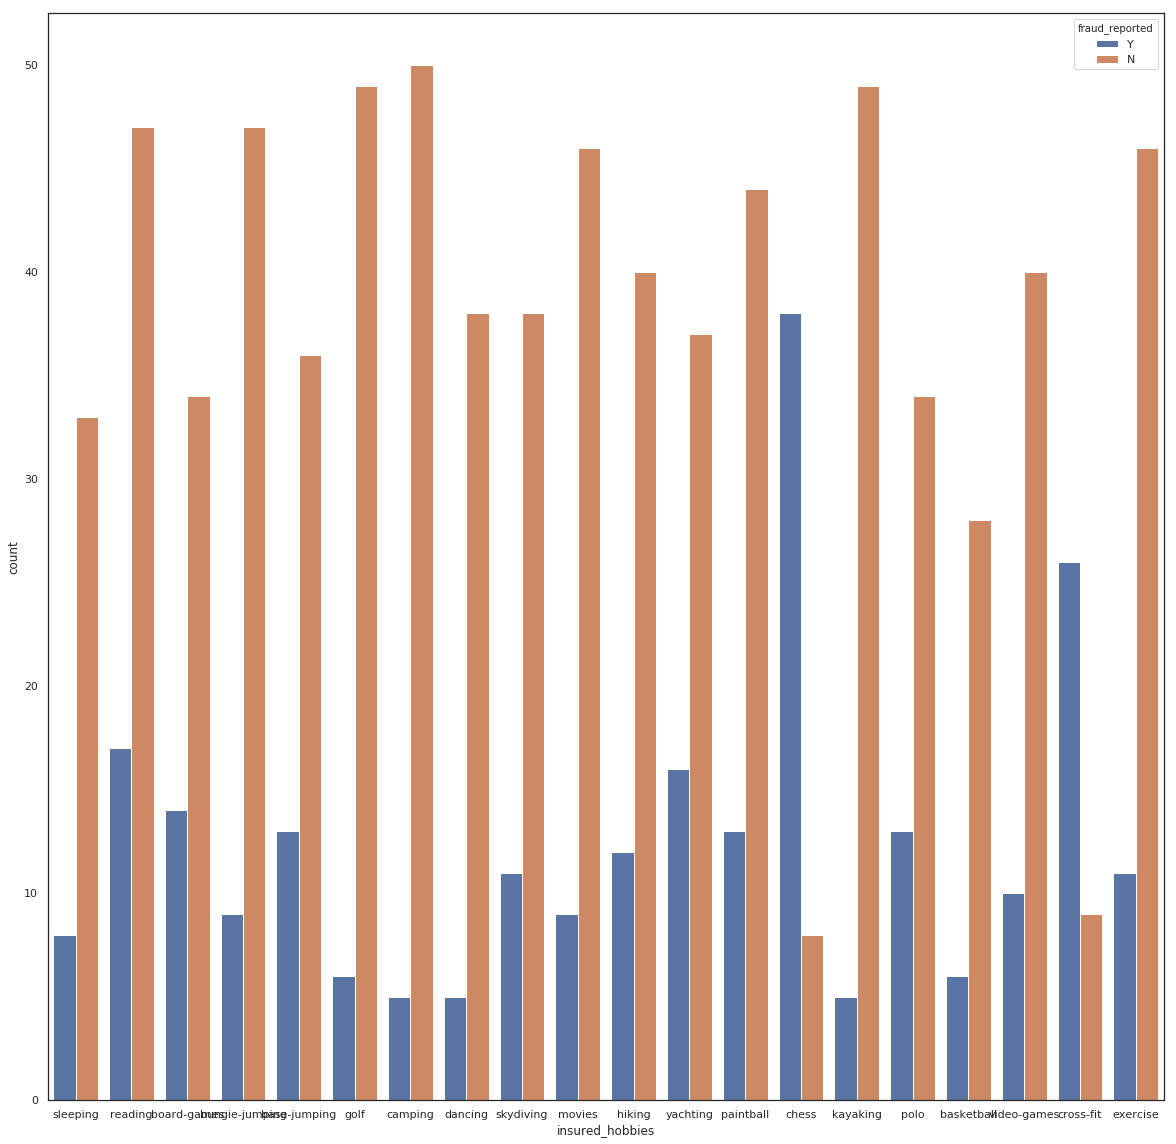

In [13]:
plt.figure(figsize=(20, 20))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

In [14]:
df['insured_hobbies']=df['insured_hobbies'].apply(lambda x :'Other' if x!='chess' and x!='cross-fit' else x)

In [15]:
low_cardinality_cols = [cname for cname in df.columns if df[cname].nunique() < 10 and df[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
df1 = df[my_cols].copy()

The above section serves a purpose of removing categorical columns that have more than 10 unique values

In [16]:
df1.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,...,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,OH,250/500,MALE,MD,Other,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,...,0,5,1,1,2,71610,6510,13020,52080,2004
1,IN,250/500,MALE,MD,Other,other-relative,Vehicle Theft,?,Minor Damage,Police,...,0,8,1,0,0,5070,780,780,3510,2007
2,OH,100/300,FEMALE,PhD,Other,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,...,0,7,3,2,3,34650,7700,3850,23100,2007
3,IL,250/500,FEMALE,PhD,Other,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,...,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,IL,500/1000,MALE,Associate,Other,unmarried,Vehicle Theft,?,Minor Damage,None,...,-46000,20,1,0,1,6500,1300,650,4550,2009


In [17]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [18]:
df1['collision_type'] = df1['collision_type'].apply(lambda x: 'unknown' if x == '?' else x)

In [19]:
df1['collision_type'].unique()

array(['Side Collision', 'unknown', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [20]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [21]:
s = (df1.dtypes == 'object')
object_cols = list(s[s].index)

In [22]:
df2 = df1.copy()
df2[object_cols] = ordinal_encoder.fit_transform(df1[object_cols])

In [23]:
df2.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,...,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,2.0,1.0,1.0,4.0,0.0,0.0,2.0,2.0,0.0,4.0,...,0,5,1,1,2,71610,6510,13020,52080,2004
1,1.0,1.0,1.0,4.0,0.0,2.0,3.0,3.0,1.0,4.0,...,0,8,1,0,0,5070,780,780,3510,2007
2,2.0,0.0,0.0,6.0,0.0,3.0,0.0,1.0,1.0,4.0,...,0,7,3,2,3,34650,7700,3850,23100,2007
3,0.0,1.0,0.0,6.0,0.0,4.0,2.0,0.0,0.0,4.0,...,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,0.0,2.0,1.0,0.0,0.0,4.0,3.0,3.0,1.0,2.0,...,-46000,20,1,0,1,6500,1300,650,4550,2009


In [24]:
df2['fraud_reported'].unique()

array([1., 0.])

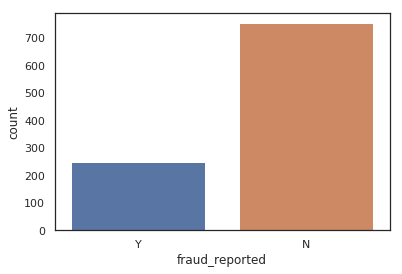

In [25]:
sns.countplot('fraud_reported', data=df1)

In [26]:
X = df2.drop('fraud_reported', axis=1)
y = df2['fraud_reported']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
##scaler = StandardScaler()
##scaler.fit(df.drop('TARGET CLASS',axis=1))

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(n_estimators=1000)

In [33]:
model = rfc.fit(X_train, y_train)

In [34]:
predictions = rfc.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predictions)

0.6566886028769436

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.87       223
         1.0       0.64      0.39      0.48        77

   micro avg       0.79      0.79      0.79       300
   macro avg       0.73      0.66      0.67       300
weighted avg       0.77      0.79      0.77       300



In [38]:
print(confusion_matrix(y_test,predictions))

[[206  17]
 [ 47  30]]


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
policy_state                   1000 non-null float64
policy_csl                     1000 non-null float64
insured_sex                    1000 non-null float64
insured_education_level        1000 non-null float64
insured_hobbies                1000 non-null float64
insured_relationship           1000 non-null float64
incident_type                  1000 non-null float64
collision_type                 1000 non-null float64
incident_severity              1000 non-null float64
authorities_contacted          1000 non-null float64
incident_state                 1000 non-null float64
incident_city                  1000 non-null float64
property_damage                1000 non-null float64
police_report_available        1000 non-null float64
fraud_reported                 1000 non-null float64
months_as_customer             1000 non-null int64
age                            1000 non-null int

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

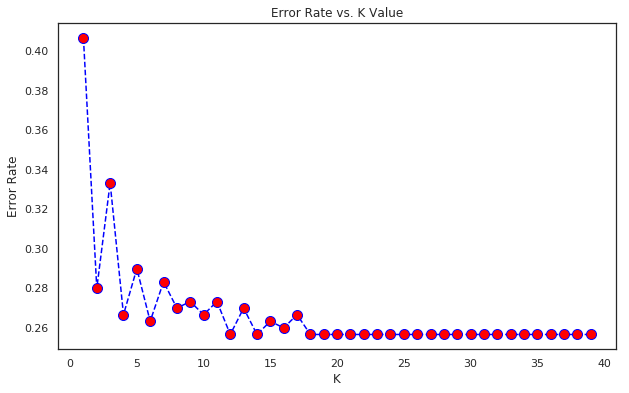

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train,y_train)
pred = knn.predict(X_test)
#error_rate.append(np.mean(pred_i != y_test))

In [44]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85       300
         1.0       0.00      0.00      0.00         0

   micro avg       0.74      0.74      0.74       300
   macro avg       0.50      0.37      0.43       300
weighted avg       1.00      0.74      0.85       300



/home/nr/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/nr/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/nr/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [45]:
from sklearn.svm import SVC

In [46]:
svc_model = SVC(gamma='auto')

In [47]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
pred2 = svc_model.predict(X_test)

In [49]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85       223
         1.0       0.00      0.00      0.00        77

   micro avg       0.74      0.74      0.74       300
   macro avg       0.37      0.50      0.43       300
weighted avg       0.55      0.74      0.63       300



/home/nr/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nr/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nr/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
df2['insured_hobbies'].unique()

array([0., 1., 2.])

In [51]:
df2.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'property_damage',
       'police_report_available', 'fraud_reported', 'months_as_customer',
       'age', 'policy_number', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year'],
      dtype='object')